In [1]:
# library import 
!pip install geopandas

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import gensim

# 한글 폰트 설정 (Windows: Malgun Gothic, Mac: AppleGothic)
plt.rc('font', family='Malgun Gothic')  # Windows
# plt.rc('font', family='AppleGothic')  # MacOS

# 마이너스 기호가 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# read data 
# CSV 파일 불러오기
df = pd.read_csv('러닝.csv')

# 데이터 확인
df.head()

,title,img,content,region
0,❤️2030 런닝크루 Run like❤️,https://img.kr.gcp-karroter.net/community/comm...,❤️2030 다이어트 런닝크루 초보회원 모집❤️\n20-30 런닝크루 run lik...,광주 동구 수기동
1,NaN,NaN,안녕하세요~\n\n요즘 운동으로 비교적 비용도 적게 들고 장소제한에서도 상대적으로 ...,광주 남구 월산동
2,NaN,NaN,우이교에서 만나 조깅하실 분들 모십니다\n러닝 자신 있으신 분들은 먼저 앞서서 러닝...,서울 강북구 미아동
3,NaN,NaN,안녕하세요. 스포츠파크에서 주로 혼자 러닝을 즐기는 직장인입니다. (하프 마라톤 완...,대구 달성군 유가읍
4,NaN,NaN,헬스장에서 런닝머신으로만 뛰어봤는데 60분 7키로정도 인터벌러닝 하고있거든요...신...,충남 아산시 풍기동


In [3]:
# 데이터 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    2169 non-null   object
 1   img      2169 non-null   object
 2   content  8237 non-null   object
 3   region   8237 non-null   object
dtypes: object(4)
memory usage: 257.5+ KB


In [5]:
## 지역별로 count
df['region']

# 'region' 칼럼에서 첫 번째 요소 추출
df['지역'] = df['region'].apply(lambda x: x.split()[0])

# 결과 확인
df[['region', '지역']].head()

# 지역별 글 개수 계산
region_count = df['지역'].value_counts()

# 결과 확인
region_count

서울     2545
경기도    2160
인천      563
부산      553
광주      347
대구      279
대전      238
충남      230
경남      227
충북      213
경북      195
강원도     191
전북      171
전남      110
울산       99
제주       80
세종시      36
Name: 지역, dtype: int64

In [7]:
region_count['지역'] = region_count['지역'].replace({
    '서울': '서울특별시',
    '경기도': '경기도',
    '인천': '인천광역시',
    '부산': '부산광역시',
    '광주': '광주광역시',
    '대구': '대구광역시',
    '대전': '대전광역시',
    '충남': '충청남도',
    '경남': '경상남도',
    '충북': '충청북도',
    '경북': '경상북도',
    '강원도': '강원도',
    '전북': '전라북도',
    '전남': '전라남도',
    '울산': '울산광역시',
    '제주': '제주특별자치도',
    '세종시': '세종특별자치시'
})



KeyError: '지역'

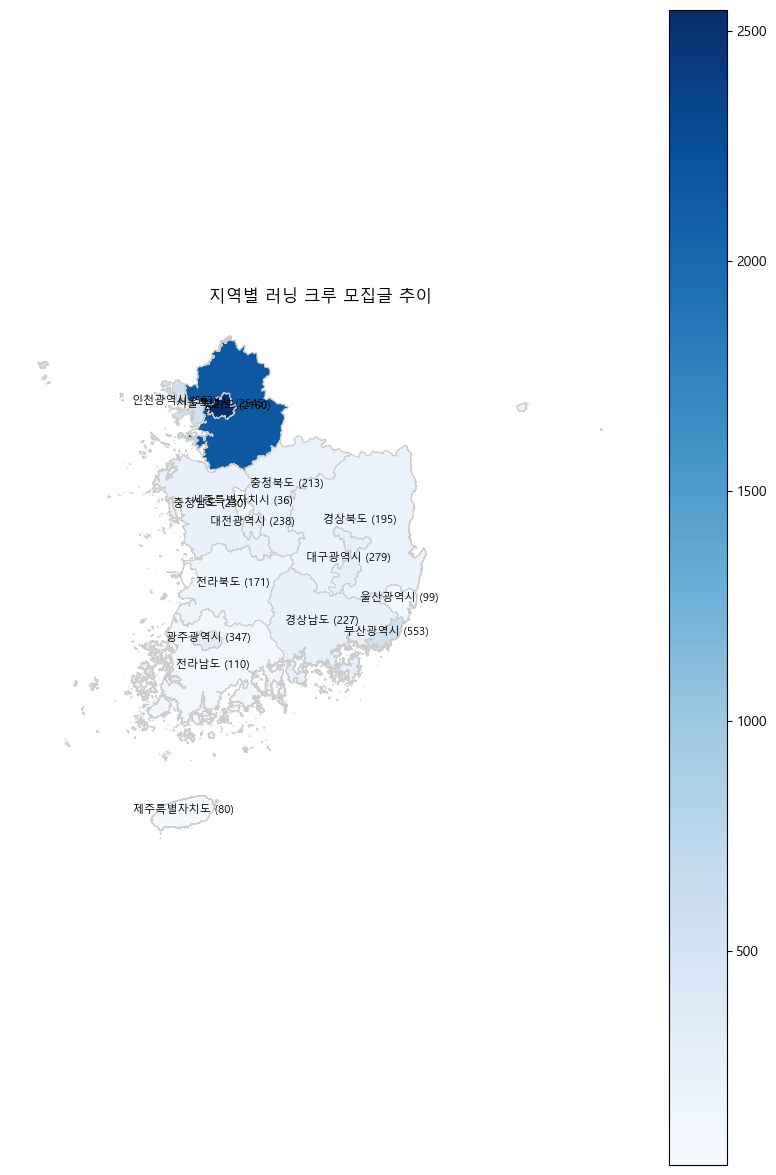

In [61]:
# 시각화를 위해 지역 이름 수정
region_df['지역'] = region_df['지역'].replace({
    '서울': '서울특별시',
    '경기도': '경기도',
    '인천': '인천광역시',
    '부산': '부산광역시',
    '광주': '광주광역시',
    '대구': '대구광역시',
    '대전': '대전광역시',
    '충남': '충청남도',
    '경남': '경상남도',
    '충북': '충청북도',
    '경북': '경상북도',
    '강원도': '강원도',
    '전북': '전라북도',
    '전남': '전라남도',
    '울산': '울산광역시',
    '제주': '제주특별자치도',
    '세종시': '세종특별자치시'
})

# 병합
merged = map_df.merge(region_df, left_on='CTP_KOR_NM', right_on='지역', how='left')

fig, ax = plt.subplots(1, 1, figsize=(10, 15))
merged.plot(column='글_개수', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# 각 지역에 이름과 글 개수 추가
for idx, row in merged.iterrows():
    if pd.notna(row['글_개수']):  # 글 개수가 있는 경우에만 표시
        plt.annotate(
            text=f"{row['CTP_KOR_NM']} ({int(row['글_개수'])})",  # 지역 이름과 글 개수
            xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),  # 중심 좌표
            ha='center', fontsize=8, color='black'
        )

plt.title('지역별 러닝 크루 모집글 추이')
plt.axis('off')
plt.show()

In [29]:
# 토픽모델링 라이브러리 임포트
import string
import re
import warnings
import pickle


from tqdm import tqdm_notebook
from tqdm import tqdm
from gensim import corpora
from gensim import models

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [30]:
!pip install konlpy

                                              0.0/19.4 MB ? eta -:--:--
     -                                        1.0/19.4 MB 20.0 MB/s eta 0:00:01
     ----                                     2.0/19.4 MB 21.4 MB/s eta 0:00:01
     -------                                  3.6/19.4 MB 25.5 MB/s eta 0:00:01
     ---------                                4.7/19.4 MB 25.0 MB/s eta 0:00:01
     ------------                             6.1/19.4 MB 26.0 MB/s eta 0:00:01
     ---------------                          7.5/19.4 MB 26.6 MB/s eta 0:00:01
     ------------------                       8.9/19.4 MB 26.9 MB/s eta 0:00:01
     --------------------                    10.3/19.4 MB 27.3 MB/s eta 0:00:01
     -----------------------                 11.6/19.4 MB 28.5 MB/s eta 0:00:01
     --------------------------              13.1/19.4 MB 29.7 MB/s eta 0:00:01
     ----------------------------            14.1/19.4 MB 28.5 MB/s eta 0:00:01
     -------------------------------         15.

In [31]:
from konlpy.tag import Okt
okt = Okt()

In [32]:
#결측치 확인 및 전처리
df.isnull().sum()

## 우리가 사용할 content에는 결측치 X

title      6068
img        6068
content       0
region        0
지역            0
dtype: int64

In [34]:
#content 텍스트 확인
df['content']

0       ❤️2030 다이어트 런닝크루 초보회원 모집❤️\n20-30 런닝크루 run lik...
1       안녕하세요~\n\n요즘 운동으로 비교적 비용도 적게 들고 장소제한에서도 상대적으로 ...
2       우이교에서 만나 조깅하실 분들 모십니다\n러닝 자신 있으신 분들은 먼저 앞서서 러닝...
3       안녕하세요. 스포츠파크에서 주로 혼자 러닝을 즐기는 직장인입니다. (하프 마라톤 완...
4       헬스장에서 런닝머신으로만 뛰어봤는데 60분 7키로정도 인터벌러닝 하고있거든요...신...
                              ...                        
8232     두류,내당, 반고개 근처에 런닝머신/사이클 기구 무료로 사용할 수 있는 곳이 있을까요?
8233    오류동역 근처에 사는데\n밖에 뛰고싶어서요!\n야외러닝하시는 분들 어디서 주로 하시나요?
8234    안녕하세요.\n\n제목 그대로 매일 아침 러닝 하실 분 계실까요?\n혼자 하려니 의...
8235    🌻2024 청년 커뮤니티 지원사업 &lt;노원 챌린저 클럽&gt; 하반기 참여자 모...
8236                                       산책이나 조깅하고싶어서요~
Name: content, Length: 8237, dtype: object

In [35]:
## 전처리 

# 정규화 함수 정의
def preprocess(series):
    series = series.map(lambda x: re.sub(r'[{}]'.format(re.escape(string.punctuation)), ' ', x)) # 구두점 제거
    series = series.map(lambda x: re.sub('[()]', ' ', x)) # 괄호 제거
    series = series.map(lambda x: re.sub(r'\d', ' ', x))  # 숫자 제거
    series = series.map(lambda x: re.sub('[^ㄱ-힣\w\s\d\b]', ' ', x)) # 특수문자 제거
    series = series.map(lambda x: re.sub(r'[^\w\s]', ' ', str(x).strip())) # 알파벳, 숫자, 공백이 아닌 문자를 공백으로 대체
    series = series.map(lambda x: re.sub('\s+', ' ', x))  # 연속된 공백을 하나의 공백으로 대체
    series = series.map(lambda x: re.sub(r'\s+', ' ', x))  # 연속된 공백을 하나의 공백으로 대체
    return series

In [36]:
## 실제 데이터셋에 적용하기 전에 테스트

# test dataset 구축
test_df = df['content'].iloc[0:10].copy()
test_df


0    ❤️2030 다이어트 런닝크루 초보회원 모집❤️\n20-30 런닝크루 run lik...
1    안녕하세요~\n\n요즘 운동으로 비교적 비용도 적게 들고 장소제한에서도 상대적으로 ...
2    우이교에서 만나 조깅하실 분들 모십니다\n러닝 자신 있으신 분들은 먼저 앞서서 러닝...
3    안녕하세요. 스포츠파크에서 주로 혼자 러닝을 즐기는 직장인입니다. (하프 마라톤 완...
4    헬스장에서 런닝머신으로만 뛰어봤는데 60분 7키로정도 인터벌러닝 하고있거든요...신...
5    안녕하세요. \n평일 이른 아침에 달릴만한 곳을 모색 중 고인돌공원이란 곳을 알게 ...
6    달리기하실 분 있으시면 연락주세요 :)\n거리/페이스 다 맞춰드려요 !\n22:15...
7    안녕하세요 망원동에 이사온지 한달된 20대 러너입니다!\n항상 같은 코스에 혼자 뛰...
8    제가 갤럭시 z플립6 쓰고있는데 접은상태에서\n러닝벨트에 휴대폰이 안들어가더라고요....
9    러닝은해야되는데 요새 귀차니즘이 심각해서 나가지를 못하는데 같이 이끌어주실\n동네 ...
Name: content, dtype: object

In [37]:
# test 실행
test_df_cleaned = preprocess(test_df)
test_df_cleaned

0    다이어트 런닝크루 초보회원 모집 런닝크루 run like 모집 나이 제한 년생 년생...
1    안녕하세요 요즘 운동으로 비교적 비용도 적게 들고 장소제한에서도 상대적으로 프리한 ...
2    우이교에서 만나 조깅하실 분들 모십니다 러닝 자신 있으신 분들은 먼저 앞서서 러닝하...
3    안녕하세요 스포츠파크에서 주로 혼자 러닝을 즐기는 직장인입니다 하프 마라톤 완주 풀...
4    헬스장에서 런닝머신으로만 뛰어봤는데 분 키로정도 인터벌러닝 하고있거든요 신정호 러닝...
5    안녕하세요 평일 이른 아침에 달릴만한 곳을 모색 중 고인돌공원이란 곳을 알게 되었습...
6     달리기하실 분 있으시면 연락주세요 거리 페이스 다 맞춰드려요 에 마감할게여 달리기 러닝
7    안녕하세요 망원동에 이사온지 한달된 대 러너입니다 항상 같은 코스에 혼자 뛰다보니까...
8    제가 갤럭시 z플립 쓰고있는데 접은상태에서 러닝벨트에 휴대폰이 안들어가더라고요 주머...
9    러닝은해야되는데 요새 귀차니즘이 심각해서 나가지를 못하는데 같이 이끌어주실 동네 러...
Name: content, dtype: object

In [38]:
# 실제 데이터에 적용
df['cleaned_content'] = preprocess(df['content']) ; df

,title,img,content,region,지역,cleaned_content
0,❤️2030 런닝크루 Run like❤️,https://img.kr.gcp-karroter.net/community/comm...,❤️2030 다이어트 런닝크루 초보회원 모집❤️\n20-30 런닝크루 run lik...,광주 동구 수기동,광주,다이어트 런닝크루 초보회원 모집 런닝크루 run like 모집 나이 제한 년생 년생...
1,NaN,NaN,안녕하세요~\n\n요즘 운동으로 비교적 비용도 적게 들고 장소제한에서도 상대적으로 ...,광주 남구 월산동,광주,안녕하세요 요즘 운동으로 비교적 비용도 적게 들고 장소제한에서도 상대적으로 프리한 ...
2,NaN,NaN,우이교에서 만나 조깅하실 분들 모십니다\n러닝 자신 있으신 분들은 먼저 앞서서 러닝...,서울 강북구 미아동,서울,우이교에서 만나 조깅하실 분들 모십니다 러닝 자신 있으신 분들은 먼저 앞서서 러닝하...
3,NaN,NaN,안녕하세요. 스포츠파크에서 주로 혼자 러닝을 즐기는 직장인입니다. (하프 마라톤 완...,대구 달성군 유가읍,대구,안녕하세요 스포츠파크에서 주로 혼자 러닝을 즐기는 직장인입니다 하프 마라톤 완주 풀...
4,NaN,NaN,헬스장에서 런닝머신으로만 뛰어봤는데 60분 7키로정도 인터벌러닝 하고있거든요...신...,충남 아산시 풍기동,충남,헬스장에서 런닝머신으로만 뛰어봤는데 분 키로정도 인터벌러닝 하고있거든요 신정호 러닝...
...,...,...,...,...,...,...
8232,NaN,NaN,"두류,내당, 반고개 근처에 런닝머신/사이클 기구 무료로 사용할 수 있는 곳이 있을까요?",대구 달서구 두류1.2동,대구,두류 내당 반고개 근처에 런닝머신 사이클 기구 무료로 사용할 수 있는 곳이 있을까요
8233,NaN,NaN,오류동역 근처에 사는데\n밖에 뛰고싶어서요!\n야외러닝하시는 분들 어디서 주로 하시나요?,서울 구로구 오류제1동,서울,오류동역 근처에 사는데 밖에 뛰고싶어서요 야외러닝하시는 분들 어디서 주로 하시나요
8234,NaN,NaN,안녕하세요.\n\n제목 그대로 매일 아침 러닝 하실 분 계실까요?\n혼자 하려니 의...,서울 영등포구 여의동,서울,안녕하세요 제목 그대로 매일 아침 러닝 하실 분 계실까요 혼자 하려니 의지가 박약하...
8235,[서울청년센터 노원] 노원 챌린저 클럽 참여자 모집,https://dnvefa72aowie.cloudfront.net/community...,🌻2024 청년 커뮤니티 지원사업 &lt;노원 챌린저 클럽&gt; 하반기 참여자 모...,서울 노원구 상계6.7동,서울,청년 커뮤니티 지원사업 lt 노원 챌린저 클럽 gt 하반기 참여자 모집 도전하다 해...


In [39]:
from konlpy.tag import Okt
from konlpy.tag import Mecab
from tqdm import tqdm

okt = Okt()

In [41]:
def get_nouns(series):
  okt_nouns = []
  for sentence in tqdm(series):
    nouns = okt.nouns(sentence)
    okt_nouns.append(nouns)
  return okt_nouns

df['topic'] = get_nouns(df['content'])

df['topic']

100%|██████████████████████████████████████████████████████████████████████████████| 8237/8237 [02:20<00:00, 58.66it/s]


0       [다이어트, 런닝, 크루, 초보, 회원, 모집, 런닝, 크루, 모집, 나이, 제한,...
1       [요즘, 운동, 비교, 비용, 장소, 제한, 상대, 프리, 런닝들, 원래, 저, 운...
2       [우이, 교, 조깅, 러닝, 자신, 분, 먼저, 앞서서, 러닝, 혼자, 운동, 안,...
3       [스포츠, 파크, 주로, 혼자, 러닝, 직장인, 하프, 마라톤, 완주, 풀, 마라톤...
4       [헬스장, 런닝머신, 키, 정도, 인터, 벌, 러닝, 신정호, 러닝, 도전, 요, ...
                              ...                        
8232          [류, 당, 고개, 근처, 런닝머신, 사이클, 기구, 무료, 사용, 수, 곳]
8233                               [오류동역, 근처, 야외, 러닝, 주로]
8234    [제목, 그대로, 매일, 아침, 러닝, 분, 요, 혼자, 의지, 시간, 등, 세부,...
8235    [청년, 커뮤니티, 지원, 사업, 노원, 린, 클럽, 하반기, 참여자, 모집, 도전...
8236                                             [산책, 조깅]
Name: topic, Length: 8237, dtype: object

In [42]:
#가장 많이 등장하는 상위 단어 500개 출력

from collections import Counter

word_counts = Counter()

for topic in df['topic']:
  for word in topic:
    word_counts[word] += 1

most_common_words = word_counts.most_common(500)
for word, count in most_common_words:
    print(f"{word}: {count}")

러닝: 4616
분: 3541
런닝: 1906
운동: 1369
곳: 1347
공원: 1110
저녁: 1035
정도: 909
근처: 874
혼자: 820
달리기: 787
코스: 768
저: 723
시간: 720
혹시: 703
요: 679
추천: 679
조깅: 639
크루: 622
좀: 619
페이스: 567
시작: 543
사람: 536
모임: 513
오늘: 506
남자: 505
아침: 498
초보: 490
쪽: 467
운동장: 462
수: 444
산책: 418
트랙: 404
장소: 400
것: 397
생각: 395
제: 358
니: 347
살: 339
구합: 326
여자: 326
때: 321
구해: 307
친구: 302
이사: 299
전: 299
주변: 287
더: 286
체력: 275
주: 274
새벽: 273
모집: 264
평일: 261
밤: 258
헬스장: 257
댓글: 256
한강: 255
나이: 248
매일: 246
요즘: 241
다이어트: 228
후: 228
해: 228
오전: 224
신분: 222
주말: 221
호수: 217
동네: 216
중: 209
거: 209
얼마: 209
걷기: 206
런닝머신: 206
퇴근: 206
날: 203
어디: 202
온: 196
연락: 190
명: 189
구: 189
환영: 185
마라톤: 182
날씨: 182
아시: 182
예정: 181
처음: 175
거리: 173
번: 173
만: 170
오후: 165
이제: 165
주로: 164
집: 161
안: 159
헬스: 157
메이트: 154
가요: 154
길: 154
사이: 154
거주: 153
취미: 151
등: 150
키: 146
보통: 146
한번: 146
목적: 145
의지: 145
학교: 145
출발: 145
그냥: 143
가끔: 141
지금: 138
글: 135
조금: 134
이: 134
건강: 133
남녀: 133
겸: 132
여성: 129
달리: 127
목표: 126
앞: 125
이후: 123
런: 123
바퀴: 121
자전거: 121
비: 120
서로:

In [43]:
#한글자 제거
df['topic'] = df['topic'].apply(lambda x: [word for word in x if len(word) > 1])
df['topic']

0       [다이어트, 런닝, 크루, 초보, 회원, 모집, 런닝, 크루, 모집, 나이, 제한,...
1       [요즘, 운동, 비교, 비용, 장소, 제한, 상대, 프리, 런닝들, 원래, 운동, ...
2       [우이, 조깅, 러닝, 자신, 먼저, 앞서서, 러닝, 혼자, 운동, 체력, 시험, ...
3       [스포츠, 파크, 주로, 혼자, 러닝, 직장인, 하프, 마라톤, 완주, 마라톤, 도...
4       [헬스장, 런닝머신, 정도, 인터, 러닝, 신정호, 러닝, 도전, 선배, 의견, 런...
                              ...                        
8232                      [고개, 근처, 런닝머신, 사이클, 기구, 무료, 사용]
8233                               [오류동역, 근처, 야외, 러닝, 주로]
8234    [제목, 그대로, 매일, 아침, 러닝, 혼자, 의지, 시간, 세부, 사항, 조율, ...
8235    [청년, 커뮤니티, 지원, 사업, 노원, 클럽, 하반기, 참여자, 모집, 도전, 혼...
8236                                             [산책, 조깅]
Name: topic, Length: 8237, dtype: object

In [44]:
def replace_words(text):
    replacements = {
        '인터':'인터벌'
        
    }

    for i, word in enumerate(text):
        for old, new in replacements.items():
            word = word.replace(old, new)
        text[i] = word
    return text

df['topic'] = df['topic'].apply(replace_words)
print(df['topic'])


0       [다이어트, 런닝, 크루, 초보, 회원, 모집, 런닝, 크루, 모집, 나이, 제한,...
1       [요즘, 운동, 비교, 비용, 장소, 제한, 상대, 프리, 런닝들, 원래, 운동, ...
2       [우이, 조깅, 러닝, 자신, 먼저, 앞서서, 러닝, 혼자, 운동, 체력, 시험, ...
3       [스포츠, 파크, 주로, 혼자, 러닝, 직장인, 하프, 마라톤, 완주, 마라톤, 도...
4       [헬스장, 런닝머신, 정도, 인터벌, 러닝, 신정호, 러닝, 도전, 선배, 의견, ...
                              ...                        
8232                      [고개, 근처, 런닝머신, 사이클, 기구, 무료, 사용]
8233                               [오류동역, 근처, 야외, 러닝, 주로]
8234    [제목, 그대로, 매일, 아침, 러닝, 혼자, 의지, 시간, 세부, 사항, 조율, ...
8235    [청년, 커뮤니티, 지원, 사업, 노원, 클럽, 하반기, 참여자, 모집, 도전, 혼...
8236                                             [산책, 조깅]
Name: topic, Length: 8237, dtype: object


In [45]:
word_counts = Counter()

for topic in df['topic']:
  for word in topic:
    word_counts[word] += 1

most_common_words = word_counts.most_common(500)
for word, count in most_common_words:
    print(f"{word}: {count}")

러닝: 4616
런닝: 1906
운동: 1369
공원: 1110
저녁: 1035
정도: 909
근처: 874
혼자: 820
달리기: 787
코스: 768
시간: 720
혹시: 703
추천: 679
조깅: 639
크루: 622
페이스: 567
시작: 543
사람: 536
모임: 513
오늘: 506
남자: 505
아침: 498
초보: 490
운동장: 462
산책: 418
트랙: 404
장소: 400
생각: 395
구합: 326
여자: 326
구해: 307
친구: 302
이사: 299
주변: 287
체력: 275
새벽: 273
모집: 264
평일: 261
헬스장: 257
댓글: 256
한강: 255
나이: 248
매일: 246
요즘: 241
다이어트: 228
오전: 224
신분: 222
주말: 221
호수: 217
동네: 216
얼마: 209
걷기: 206
런닝머신: 206
퇴근: 206
어디: 202
연락: 190
환영: 185
마라톤: 182
날씨: 182
아시: 182
예정: 181
처음: 175
거리: 173
오후: 165
이제: 165
주로: 164
헬스: 157
메이트: 154
가요: 154
사이: 154
거주: 153
취미: 151
보통: 146
한번: 146
목적: 145
의지: 145
학교: 145
출발: 145
그냥: 143
가끔: 141
지금: 138
조금: 134
건강: 133
남녀: 133
여성: 129
달리: 127
목표: 126
이후: 123
바퀴: 121
자전거: 121
서로: 120
최근: 119
이번: 117
개방: 117
초보자: 116
관심: 115
공유: 115
러너: 113
성별: 111
후반: 110
등산: 110
다시: 110
중반: 108
가입: 107
초반: 107
현재: 102
활동: 102
남성: 100
참여: 98
계시: 98
다른: 97
체육: 95
런린: 95
강아지: 95
자주: 94
위해: 94
보고: 93
속도: 92
일주일: 91
내일: 91
이용: 91
서울: 90
하루: 89
시간대: 89
이상: 

In [46]:
stop_words = ['이제', '주로', '이번', '개방', '다시', '다른', '때문',
             '인근', '살이', '등등', '진짜', '참고', '부터', '생활',
             '중앙', '사시', '이면', '저희', '거나', '별로', '해도', '아래',
             '가면', '중이', '광교', '어디가', '거의', '온천천', '웨이',
             '공부', '부산', '커피', '끼리', '동쪽', '기분', '크게', '제일',
             '가야', '사례', '입구', '이나', '신가', '경우', '적극', '따라서',
             '포함', '안나', '반복', '빡세', '최대한', '데이', '자신',
             '유산', '점점', '여러분', '하니', '전혀']

def remove_stop_words(text):
  return [word for word in text if word not in stop_words]

df['topic'] = df['topic'].apply(lambda x: remove_stop_words(x))
df['topic']

0       [다이어트, 런닝, 크루, 초보, 회원, 모집, 런닝, 크루, 모집, 나이, 제한,...
1       [요즘, 운동, 비교, 비용, 장소, 제한, 상대, 프리, 런닝들, 원래, 운동, ...
2       [우이, 조깅, 러닝, 먼저, 앞서서, 러닝, 혼자, 운동, 체력, 시험, 대비, ...
3       [스포츠, 파크, 혼자, 러닝, 직장인, 하프, 마라톤, 완주, 마라톤, 도전, 요...
4       [헬스장, 런닝머신, 정도, 인터벌, 러닝, 신정호, 러닝, 도전, 선배, 의견, ...
                              ...                        
8232                      [고개, 근처, 런닝머신, 사이클, 기구, 무료, 사용]
8233                                   [오류동역, 근처, 야외, 러닝]
8234    [제목, 그대로, 매일, 아침, 러닝, 혼자, 의지, 시간, 세부, 사항, 조율, ...
8235    [청년, 커뮤니티, 지원, 사업, 노원, 클럽, 하반기, 참여자, 모집, 도전, 혼...
8236                                             [산책, 조깅]
Name: topic, Length: 8237, dtype: object

In [48]:
all_tokens = df['topic'].tolist()
dictionary = gensim.corpora.Dictionary(all_tokens)
print('dictionary size : %d' % len(dictionary))
corpus = [dictionary.doc2bow(text) for text in all_tokens]

dictionary size : 7820


In [ ]:
#perplexity
import matplotlib.pyplot as plt
perplexity_values = []
for i in range(2,15):
  ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=i, id2word=dictionary, passes=10)
  perplexity_values.append(ldamodel.log_perplexity(corpus))


x = range(2,15)
plt.plot(x, perplexity_values)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.show()

In [ ]:
# coherence: 토픽이 얼마나 의미론적으로 일관성 있는가? 높을수록 의미론적 일관성이 높임
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
  ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
  coherence_model_lda=CoherenceModel(model=ldamodel, texts=all_tokens, dictionary=dictionary, topn=10)
  coherence_lda=coherence_model_lda.get_coherence()
  coherence_values.append(coherence_lda)

x=range(2,15)
plt.plot(x, coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()


In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
vis

In [51]:
#BoW 생성
from gensim.models import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [52]:
#dictionary 만들기
dictionary = corpora.Dictionary(df['topic'])

2024-11-02 21:16:42,118 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-11-02 21:16:42,414 : INFO : built Dictionary<7820 unique tokens: ['가입', '걷기', '금지', '나이', '다이어트']...> from 8237 documents (total 71845 corpus positions)
2024-11-02 21:16:42,416 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<7820 unique tokens: ['가입', '걷기', '금지', '나이', '다이어트']...> from 8237 documents (total 71845 corpus positions)", 'datetime': '2024-11-02T21:16:42.416539', 'gensim': '4.3.0', 'python': '3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'created'}


In [53]:
#너무 흔한 단어나 너무 독특한 단어는 의미가 없기 때문에 필터링 진행
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in df['topic']]

2024-11-02 21:16:48,038 : INFO : discarding 4046 tokens: [('런닝들', 1), ('앞서서', 1), ('우이', 1), ('모색', 1), ('신축', 1), ('플립', 1), ('충정로', 1), ('런닝코스갗', 1), ('부둣길쪽', 1), ('뒤꿈치', 1)]...
2024-11-02 21:16:48,039 : INFO : keeping 3774 tokens which were in no less than 2 and no more than 4118 (=50.0%) documents
2024-11-02 21:16:48,051 : INFO : resulting dictionary: Dictionary<3774 unique tokens: ['가입', '걷기', '금지', '나이', '다이어트']...>


In [54]:
num_topics = 7
chunksize = 2000
passes = 20
iterations = 400
eval_every = 1

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2024-11-02 21:16:51,867 : INFO : using autotuned alpha, starting with [0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715]
2024-11-02 21:16:51,872 : INFO : using serial LDA version on this node
2024-11-02 21:16:51,877 : INFO : running online (multi-pass) LDA training, 7 topics, 20 passes over the supplied corpus of 8237 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2024-11-02 21:16:54,450 : INFO : -9.403 per-word bound, 677.1 perplexity estimate based on a held-out corpus of 2000 documents with 17721 words
2024-11-02 21:16:54,452 : INFO : PROGRESS: pass 0, at document #2000/8237
2024-11-02 21:16:56,556 : INFO : optimized alpha [0.102923706, 0.101908885, 0.09882436, 0.10770281, 0.13611825, 0.09996234, 0.11839274]
2024-11-02 21:16:56,562 : INFO : merging changes from 2000 documents into a model of 8237 documents
2024-11-02 21:16:56,570 : INFO : topic 

In [55]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

2024-11-02 21:19:53,751 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2024-11-02 21:19:53,761 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2024-11-02 21:19:53,771 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2024-11-02 21:19:53,779 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2024-11-02 21:19:53,788 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2024-11-02 21:19:53,795 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2024-11-02 21:19:53,805 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2024-11-02 21:19:53,814 : INFO : CorpusAccumulator accumulated stats from 8000 documents


Average topic coherence: -8.6668.
[([(0.078924924, '러닝'),
   (0.047944713, '운동'),
   (0.038634866, '저녁'),
   (0.03414578, '정도'),
   (0.0290903, '혼자'),
   (0.026086655, '시간'),
   (0.01958946, '남자'),
   (0.019558188, '페이스'),
   (0.018773664, '런닝'),
   (0.01700397, '오늘'),
   (0.01618324, '달리기'),
   (0.016137451, '시작'),
   (0.014822708, '생각'),
   (0.014339365, '초보'),
   (0.012342518, '구합'),
   (0.01149815, '구해'),
   (0.0113921845, '체력'),
   (0.011246774, '크루'),
   (0.011243251, '아침'),
   (0.010316813, '여자')],
  -2.729514429499337),
 ([(0.09144177, '러닝'),
   (0.052423466, '런닝'),
   (0.04359675, '근처'),
   (0.033553865, '혹시'),
   (0.032032784, '코스'),
   (0.031055134, '추천'),
   (0.024012337, '운동장'),
   (0.022610864, '트랙'),
   (0.0221023, '공원'),
   (0.021387765, '조깅'),
   (0.01933043, '사람'),
   (0.018348468, '달리기'),
   (0.016934197, '산책'),
   (0.014012743, '아침'),
   (0.013001727, '새벽'),
   (0.012624771, '이사'),
   (0.012129357, '어디'),
   (0.01187065, '장소'),
   (0.01180498, '주변'),
   (0.010508009

In [59]:
!pip install --user pyLDAvis


  ERROR: Error [WinError 225] 파일에 바이러스 또는 기타 사용자 동의 없이 설치된 소프트웨어가 있기 때문에 작업이 완료되지 않았습니다 while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] 파일에 바이러스 또는 기타 사용자 동의 없이 설치된 소프트웨어가 있기 때문에 작업이 완료되지 않았습니다




  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
  Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached FuzzyTM-2.0.9-py3-none-any.whl (31 kB)
  Using cached pyFUME-0.3.4-py3-none-any.whl (60 kB)
  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached simpful-2.12.0-py3-none-any.whl (24 kB)
  Using cached fst-pso-1.8.1.tar.gz (18 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [58]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, '러닝.html')

ModuleNotFoundError: No module named 'pyLDAvis'